In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2019-08-02 13:59:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.31.176, 2404:6800:4004:80c::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.31.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-08-02 13:59:31 (123 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
data = open('/tmp/sonnets.txt').read()
corpus = data.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [9]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len - 1))
model.add(Bidirectional(LSTM(120, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(96))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))


model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 128)           411008    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 240)           239040    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 240)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 96)                129408    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              155685    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 6,092,007
Trainable params: 6,092,007
Non-trainable params: 0
____________________________________________

In [10]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.9226 - acc: 0.0205
Epoch 2/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.4987 - acc: 0.0222
Epoch 3/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.3831 - acc: 0.0268
Epoch 4/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.2617 - acc: 0.0288
Epoch 5/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.1747 - acc: 0.0316
Epoch 6/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.0947 - acc: 0.0373
Epoch 7/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.0190 - acc: 0.0405
Epoch 8/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 5.9429 - acc: 0.0427
Epoch 9/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 5.8497 - acc: 0.0490
Epoch 10/100
15462/15462 [==============================] - 25s 2ms/sampl

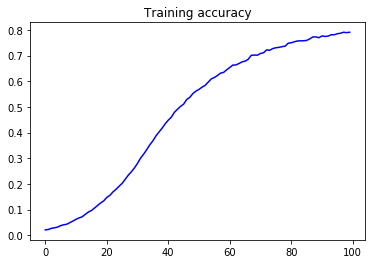

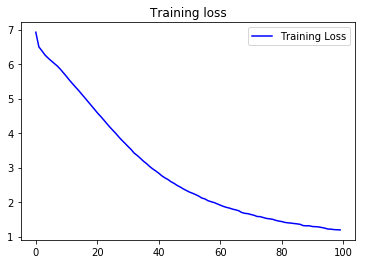

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [16]:
seed_text = "The true purpose of deep learning is making memes because"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)

The true purpose of deep learning is making memes because give fullness me all trust it young to blind dear praise and thee is she young such brow level to groan to both other so dumb strife cheeks forth ' write me long bright heart so bright he open wide disdain dead mute can ride feast so cheer blind brow brand brow wrong age remain date thus there on your face may pride men in time words he young ' live so bright truth well grown so bright ' both dyed back again so back open bettering of so worth forth life me bright true pride out me ten spirit
